# Parte 2 - Analizando la base

In [3]:
#Importamos las librerias necesarias
#!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve # No anda en mi versión de sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit

In [4]:
#Importamos el dataset
# RODRI 
os.chdir("C:/Users/rodri/OneDrive/Escritorio/Maestría/Big Data/BigData/TP2")
# FRAN 
#os.chdir("C:/Users/LENOVO/Desktop/udesa/3er timestre/Big Data/Tutoriales/TP2")
# JUAN
#os.chdir("C:/Users/Usuario/Desktop/MAESTRIA/Big Data/TPs/BigData/TP2")


### Data wrangling

In [5]:
#Abrimos el dataset
# cargamos los datos de respondieron y no respondieron
respondieron = pd.read_excel("respondieron.xlsx")
norespondieron = pd.read_excel("norespondieron.xlsx")

Eliminamos todas las variables relacionadas a ingresos de ambas bases

In [6]:
# Eliminamos las variables de ingresos:
respondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI","P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII","TOT_P12","P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO","PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3", "PP06A", "PP06C", "PP06D", "PP06E", "PP06H", "ITF","DECIFR","IDECIFR","RDECIFR","GDECIFR", "PDECIFR","ADECIFR","IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"] ,axis =1, inplace = True)
norespondieron.drop(["V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI","P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII","TOT_P12","P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO","PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3", "PP06A", "PP06C", "PP06D", "PP06E", "PP06H", "ITF","DECIFR","IDECIFR","RDECIFR","GDECIFR", "PDECIFR","ADECIFR","IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"] ,axis =1, inplace = True)


#Eliminamos las variables adulto_equiv, ad_equiv_hogar e ingreso_necesario:
respondieron.drop (["adulto_equiv", "ad_equiv_hogar",  "ingreso_necesario"] , axis =1 , inplace = True)
norespondieron.drop (["adulto_equiv", "ad_equiv_hogar"] , axis =1 , inplace = True)



In [7]:
# Como los algoritmos no funcionan si hay missing values, vamos a eliminar aquellos registros que tengan mas del 50% de missing values
threshold = 0.50 * len(respondieron)
respondieron = respondieron.dropna(axis=1, thresh=threshold)
# Ahora con los NA restante revisamos cuantos quedaron en cada columna
na_counts = respondieron.isna().sum()

# Quedan muchos NA eentonces eeliminamos las filas que tienen NA
respondieron = respondieron.dropna()

# Hacemos los mismo con los quee no respondieeron
norespondieron = norespondieron.dropna(axis=1, thresh=threshold)
norespondieron = norespondieron.dropna()

#Eliminamos otras variables no utiles:
respondieron.drop (["CODUSU", "CH05","Edad"] , axis =1 , inplace = True)
norespondieron.drop (["CODUSU", "CH05","Edad"] , axis =1 , inplace = True)


In [8]:
# Nos aseguramos que las variables sean numericas
#Pasamos a float la variable MAS_500 a foat, replazar S = 1 y N = 0
respondieron["MAS_500"] = respondieron["MAS_500"].replace("S",1)
respondieron["MAS_500"] = respondieron["MAS_500"].replace("N",0)
norespondieron["MAS_500"] = norespondieron["MAS_500"].replace("S",1)
norespondieron["MAS_500"] = norespondieron["MAS_500"].replace("N",0)


        


In [9]:
respondieron = respondieron.astype(float)
norespondieron = norespondieron.astype(float)

# Comprobamos
#print(respondieron.columns)
#print(norespondieron.columns)

Partimos la muestra en train y test:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(respondieron.loc[:, respondieron.columns!="pobre" ], respondieron["pobre"],test_size=0.3, random_state=201)

print("La base X Test corresponde al",round(len(X_test)/len(respondieron)*100), "% de los datos") #Vemos que test es el 30% de la muestra 
print("La base X Train corresponde al", round(len(X_train)/len(respondieron)*100),  "% de los datos") #Vemos que test es el 70% de la muestra 
print("La base y Test corresponde al",round(len(y_test)/len(respondieron)*100), "% de los datos") #Vemos que test es el 30% de la muestra 
print("La base y Train corresponde al", round(len(y_train)/len(respondieron)*100),  "% de los datos") #Vemos que test es el 70% de la muestra 

#Agregamos una columna de 1 a la base X_train:
X_train["intercept"]=1
X_test["intercept"]=1
norespondieron["intercept"]=1

La base X Test corresponde al 30 % de los datos
La base X Train corresponde al 70 % de los datos
La base y Test corresponde al 30 % de los datos
La base y Train corresponde al 70 % de los datos


## Métodos de Clasificación

Implementemos los siguientes métodos de clasificacion, reportando  la matriz de confusión, la curva ROC y los valores de AUC y de Accuracy de cada uno:

### Logit

En primer lugar estimamos el modelo logit:

In [11]:
# Estimamo el modelo logit con las bases Train:
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

#Creamos el vector de predicciones (basado en la regla de bayes)
y_pred_log = log_reg.predict(X_test)

##### Métricas de predicción del Logit

Primero exponemos la Matriz de confusión

Confusion Matrix :
[[716 122]
 [176 241]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

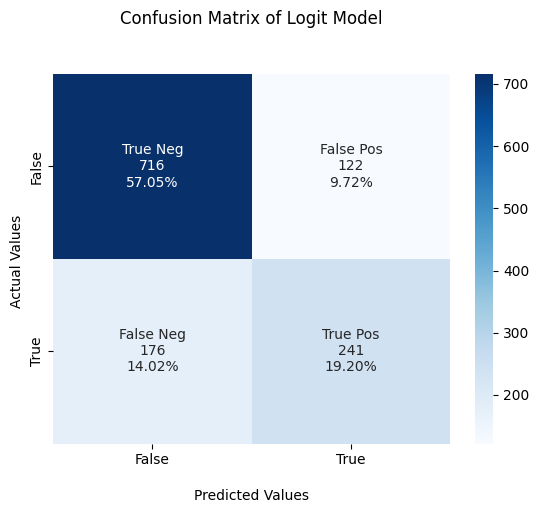

In [12]:
matriz_confusion_log = confusion_matrix(y_test, y_pred_log)

print('Confusion Matrix :')
print(matriz_confusion_log)

#Plot de la Matriz
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_log.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_log.flatten()/np.sum(matriz_confusion_log)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_log, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix of Logit Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos como vimos en clase.

Ahora vemos el Accuracy Score:

In [13]:
ac_log= accuracy_score(y_test, y_pred_log)
print('Accuracy Score :','%.3f' % ac_log) #Esto suma los % de la diagonal principal 

Accuracy Score : 0.763


AUC & ROC

AUC Logit: 0.716


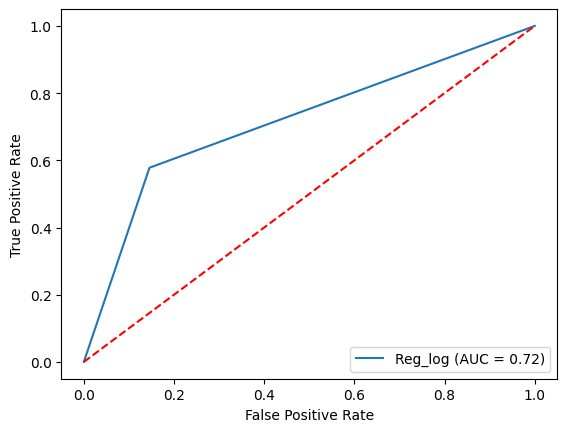

In [14]:
auc_log = roc_auc_score(y_test, y_pred_log)
print('AUC Logit: %.3f' % auc_log)

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)

display = RocCurveDisplay(fpr=fpr_log, tpr=tpr_log, roc_auc=auc_log, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

#Vemos que el clasificador tiene el mismo desempeño que un clasificador aleatorio.

### Análisis de discriminante Lineal

Ahora vemos las predicciónes del análisis de discriminante linal y realizamos las mismas métricas de la predicción 

In [15]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda = lda.fit(X_train, y_train)

Hacemos la predicción con el modelo de Análisis discriminante lineal sobre las X test:


In [16]:
y_pred_lda = lda.predict(X_test) 

##### Métricas de la predicción de LDA

Matriz de confusión:

Confusion Matrix :
[[717 121]
 [175 242]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

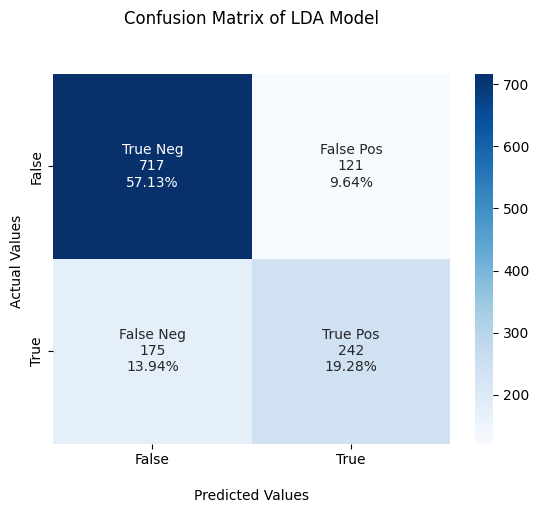

In [17]:
matriz_confusion_lda = confusion_matrix(y_test, y_pred_lda)

print('Confusion Matrix :')
print(matriz_confusion_lda)

#Plot de la Matriz
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_lda.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_lda.flatten()/np.sum(matriz_confusion_lda)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_lda, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix of LDA Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Accuracy Score: 

In [18]:
ac_lda= accuracy_score(y_test, y_pred_lda)
print('\n','Accuracy Score LDA:','%.3f' % ac_lda)


 Accuracy Score LDA: 0.764


AUC & ROC


 AUC Linear discriminant analysis: 0.718 



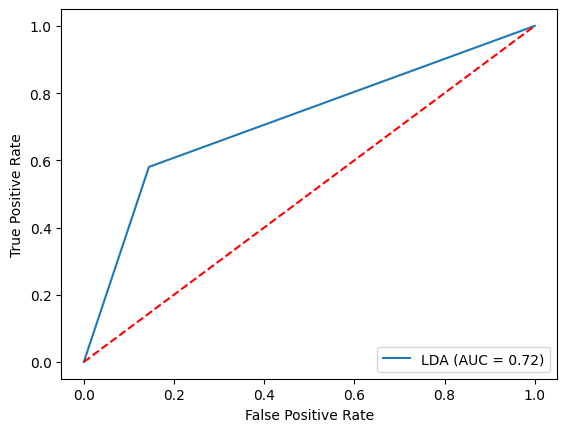

In [19]:
auc_lda = roc_auc_score(y_test, y_pred_lda)
print('\n','AUC Linear discriminant analysis:', '%.3f' % auc_lda,'\n')

fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred_lda)

display = RocCurveDisplay(fpr=fpr_lda, tpr=tpr_lda, roc_auc=auc_lda, estimator_name='LDA')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### K Nearest Neighbor

Vemos las predicciones de KNN para k=3 y realizamos las mismas métricas de la predicción 

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

Hacemos la predicción con el modelo KNN (k=3) sobre las X test

In [21]:

y_pred_knn = knn.predict(X_test)


Métricas de predicción de KNN (k=3)

Matriz de confusión:

Confusion Matrix :
[[694 144]
 [ 65 352]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

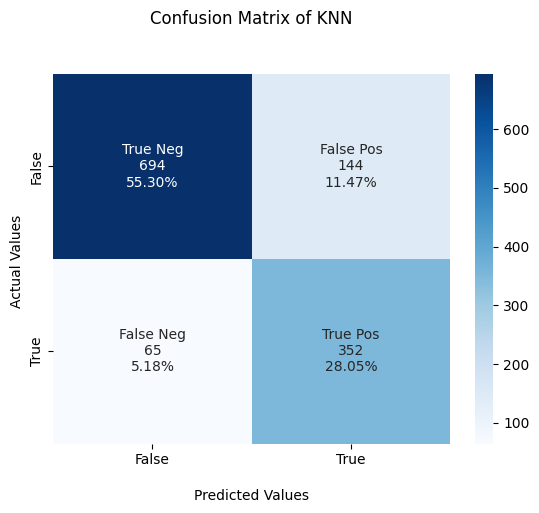

In [22]:
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)

print('Confusion Matrix :')
print(matriz_confusion_knn)

#Plot de la Matriz
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_knn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_knn.flatten()/np.sum(matriz_confusion_knn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_knn, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix of KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Accuracy Score:

In [23]:
ac_knn = accuracy_score(y_test, y_pred_knn)
print('\n',"La precisión del modelo KNN: %.3f" %ac_knn)     



 La precisión del modelo KNN: 0.833


AUC y ROC


 AUC KNN: 0.84 



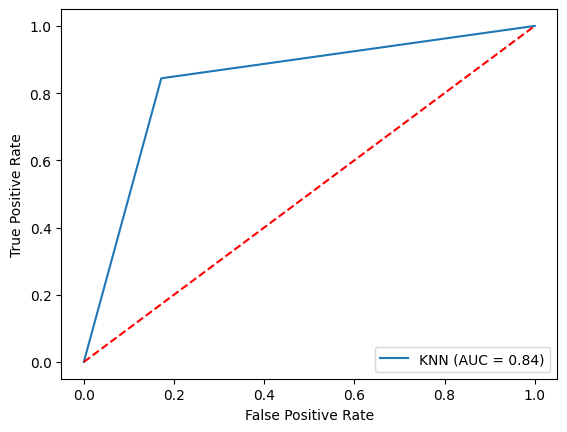

In [39]:
auc_knn = roc_auc_score(y_test, y_pred_knn)
print('\n','AUC KNN:', '%.2f' % auc_knn,'\n')

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)

display = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=auc_knn, estimator_name='KNN')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### ¿Cuál es el mejor modelo? 

## Ejercicio 5

In [ ]:
# Predecimos con el modelo KNN sobre la base df_norespondieron:

In [24]:
y_pred_nr = knn.predict(norespondieron) 


Contamos la cantidad de pobres predicha dentro de la muestra de no respondieron.

In [27]:
pobres_nr=np.sum(y_pred_nr)
tasa_pobreza_nr=np.sum(y_pred_nr)/len(y_pred_nr)


print('\n',"La cantidad de pobres predicha en la muestra que no respondio es de:", pobres_nr, "de", len(y_pred_nr),'\n')
print("La tasa de pobreza predicha en la muestra de los que no respondieron es de:", round(tasa_pobreza_nr*100,2), "%")
# Acá pide proporción, yo calcule la tasa de pobreza (CHECKEAR)
print("La proporción de pobres predicha en la muestra de los que no respondieron es de:", pobres_nr/len(y_pred_nr))


 La cantidad de pobres predicha en la muestra que no respondio es de: 1076.0 de 3390 

La tasa de pobreza predicha en la muestra de los que no respondieron es de: 31.74 %
La proporción de pobres predicha en la muestra de los que no respondieron es de: 0.31740412979351035


## Ejercicio 6

Seleccionamos las variables que pensamos relevantes e implementamos nuevamente el método logit.

Las variables seleccionadas fueron: 

Sexo, edad, cobertura medica, si sabe leer o escribir, ,educación y establecimiento, y  variables sobre busqueda de trabajo. 

Cabe resaltar que la que no sacamos fue la variable pobre debido a que es relevante para nuestro análisis

In [45]:
Seleccion= respondieron[["Sexo","CH06","CH08","CH09","CH10","CH11","CH12","CH13","NIVEL_ED", "ESTADO", "PP02E", "PP02H", "PP02I","pobre"]] 

In [48]:
#Divisimos la base
X_train2, X_test2, y_train2, y_test2 = train_test_split(Seleccion.loc[:, Seleccion.columns!="pobre" ], Seleccion["pobre"],test_size=0.3, random_state=201)


# Estimamo el modelo logit con las bases Train:
log_reg2 = LogisticRegression(max_iter= 1000).fit(X_train2, y_train2)

#Creamos el vector de predicciones (basado en la regla de bayes)
y_pred_log2 = log_reg2.predict(X_test2)

Métricas de la predicción del Logit

Matriz de confusión

Confusion Matrix :
[[714 124]
 [195 222]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

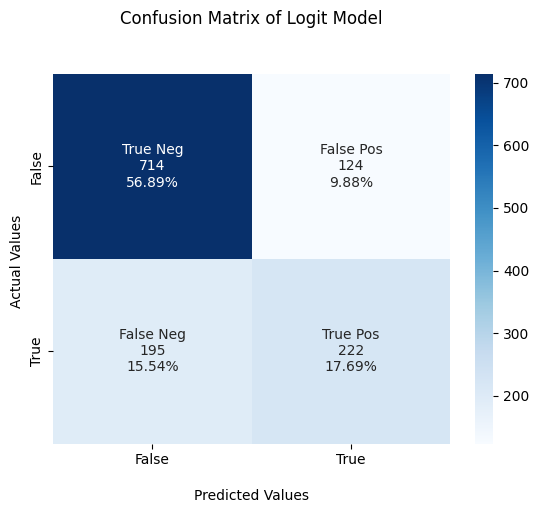

In [49]:
matriz_confusion_log2 = confusion_matrix(y_test2, y_pred_log2)

print('Confusion Matrix :')
print(matriz_confusion_log2)

#Plot de la Matriz
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_log2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_log2.flatten()/np.sum(matriz_confusion_log2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_log2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix of Logit Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Accuracy Score:

In [50]:
ac_log2= accuracy_score(y_test2, y_pred_log2)
print('Accuracy Score :','%.3f' % ac_log2) 

Accuracy Score : 0.746


AUC & ROC

AUC Logit: 0.692


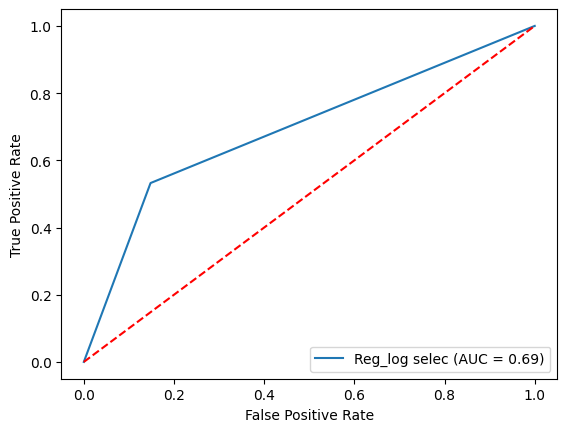

In [51]:
auc_log2 = roc_auc_score(y_test2, y_pred_log2)
print('AUC Logit: %.3f' % auc_log2)

fpr_log2, tpr_log2, thresholds_log2 = roc_curve(y_test2, y_pred_log2)

display = RocCurveDisplay(fpr=fpr_log2, tpr=tpr_log2, roc_auc=auc_log2, estimator_name='Reg_log selec')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

### Conclusión: 

#### El modelo logit con la selección de variables bajo su precisión relativo al modelo logit original. Sin embargo, los cambios no son demasiado grandes y en el segundo modelo estamos incluyendo variables que tienen un efecto directo sobre la pobreza mientras que en el primer modelo estamos incluyendo variables que probablemente sean irrelevantes al momento de explicar la variable de interés.